In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
# Load the cleaned data
clean_df = pd.read_csv('../data/clean_hr_employee_attrition.csv')

In [7]:
# Display the first few rows of the dataset
clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


In [9]:
# Check for missing values
clean_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
# Get basic information about the dataset
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1356 non-null   int64 
 1   Attrition                 1356 non-null   object
 2   BusinessTravel            1356 non-null   object
 3   DailyRate                 1356 non-null   int64 
 4   Department                1356 non-null   object
 5   DistanceFromHome          1356 non-null   int64 
 6   Education                 1356 non-null   int64 
 7   EducationField            1356 non-null   object
 8   EnvironmentSatisfaction   1356 non-null   int64 
 9   Gender                    1356 non-null   object
 10  HourlyRate                1356 non-null   int64 
 11  JobInvolvement            1356 non-null   int64 
 12  JobLevel                  1356 non-null   int64 
 13  JobRole                   1356 non-null   object
 14  JobSatisfaction         

In [17]:
# Encode the 'Attrition' column (target variable)
label_encoder = LabelEncoder()
clean_df['Attrition'] = label_encoder.fit_transform(clean_df['Attrition'])

In [19]:
# For other categorical columns like 'BusinessTravel', 'Department', 'Gender', you can use pd.get_dummies()
data = pd.get_dummies(clean_df, drop_first=True)  # Drop the first column to avoid multicollinearity

In [21]:
# Define your features (X) and target variable (y)
X = data.drop('Attrition', axis=1)  # Drop target column from features
y = data['Attrition']  # Target variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [31]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8345588235294118


In [33]:
# Get a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       224
           1       0.71      0.10      0.18        48

    accuracy                           0.83       272
   macro avg       0.78      0.55      0.54       272
weighted avg       0.82      0.83      0.78       272



In [35]:
# Optionally, use cross-validation to further assess the model
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.84558824 0.84501845 0.8597786  0.84870849 0.84501845]


In [37]:
# Get feature importance
feature_importances = rf_model.feature_importances_

# Sort features by importance
feature_importances_sorted = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in feature_importances_sorted:
    print(f"{feature}: {importance}")

Feature Importances:
MonthlyIncome: 0.0783309551179174
Age: 0.060002023346143636
DailyRate: 0.05862127734052295
TotalWorkingYears: 0.05118091654403954
OverTime_Yes: 0.050016042582325414
HourlyRate: 0.048379322483391496
DistanceFromHome: 0.045050614900284676
MonthlyRate: 0.04379547783743264
YearsAtCompany: 0.04145718699530133
PercentSalaryHike: 0.03882646781754045
NumCompaniesWorked: 0.03473021432515517
StockOptionLevel: 0.03389063105748711
YearsWithCurrManager: 0.03263892079672115
EnvironmentSatisfaction: 0.030948057219172872
YearsInCurrentRole: 0.028041488135027708
YearsSinceLastPromotion: 0.02647317122709787
TrainingTimesLastYear: 0.023885857338492314
JobSatisfaction: 0.02381950036504421
JobInvolvement: 0.023149763618033028
RelationshipSatisfaction: 0.02277461559992264
Education: 0.022407295249329034
JobLevel: 0.02051896611940456
WorkLifeBalance: 0.018084709324705083
MaritalStatus_Single: 0.014253663661389226
BusinessTravel_Travel_Frequently: 0.012996968132573734
EducationField_Medic

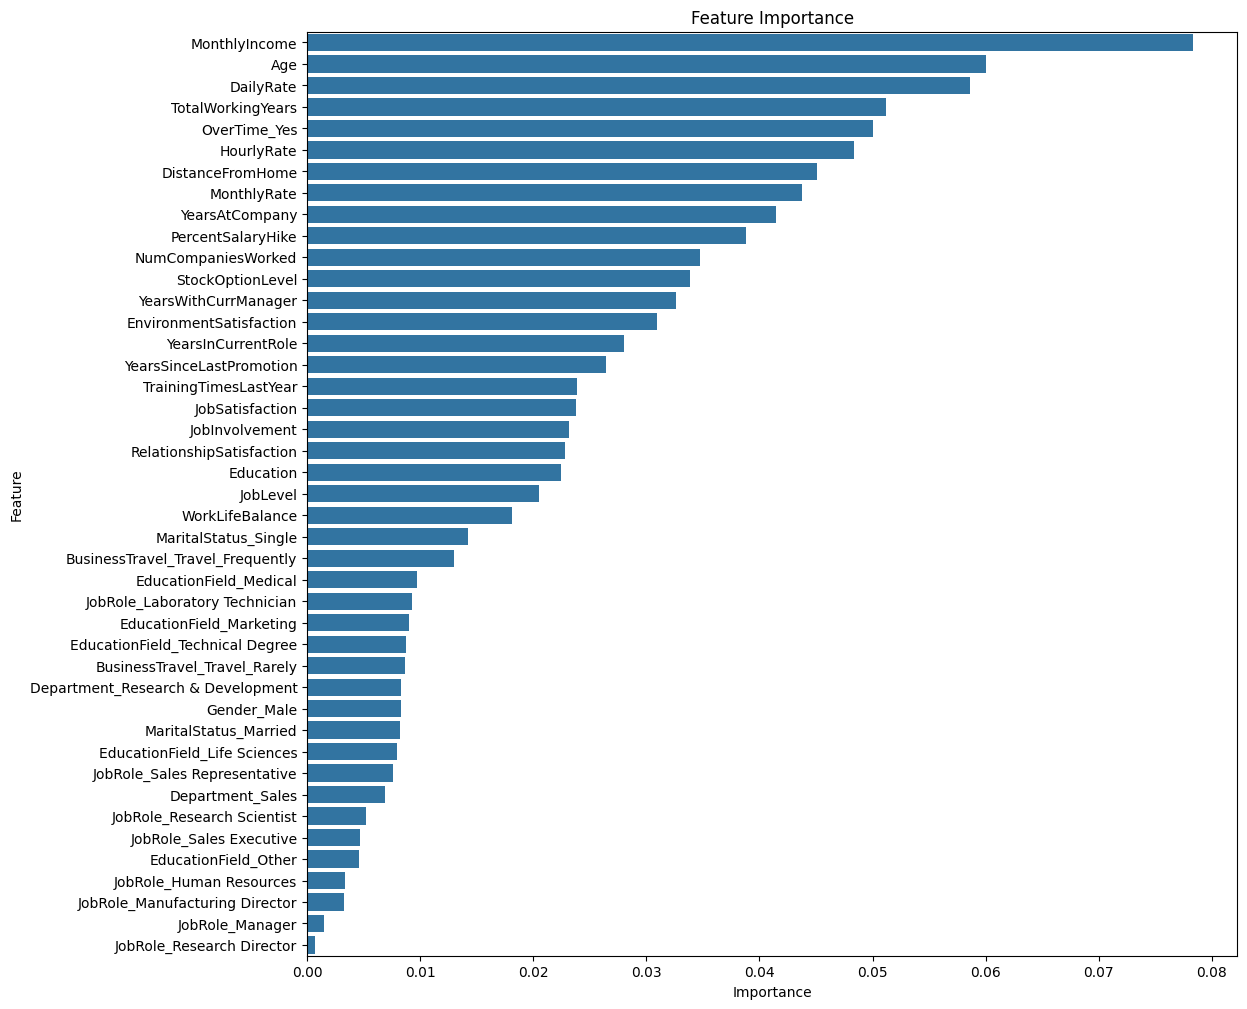

In [55]:
# Plotting feature importance
features = X.columns
importances = rf_model.feature_importances_

# Create a DataFrame to make it easier to plot
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

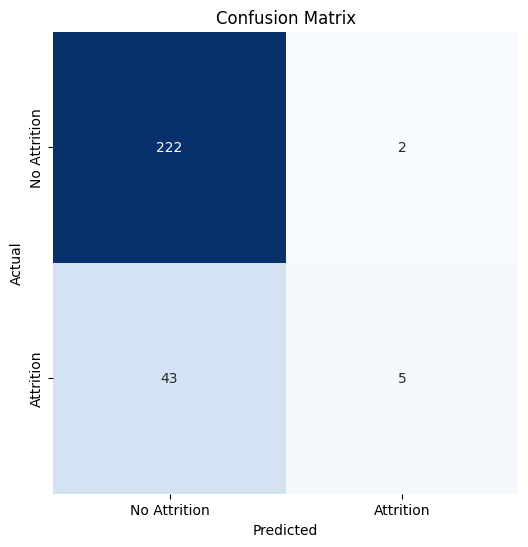

In [57]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

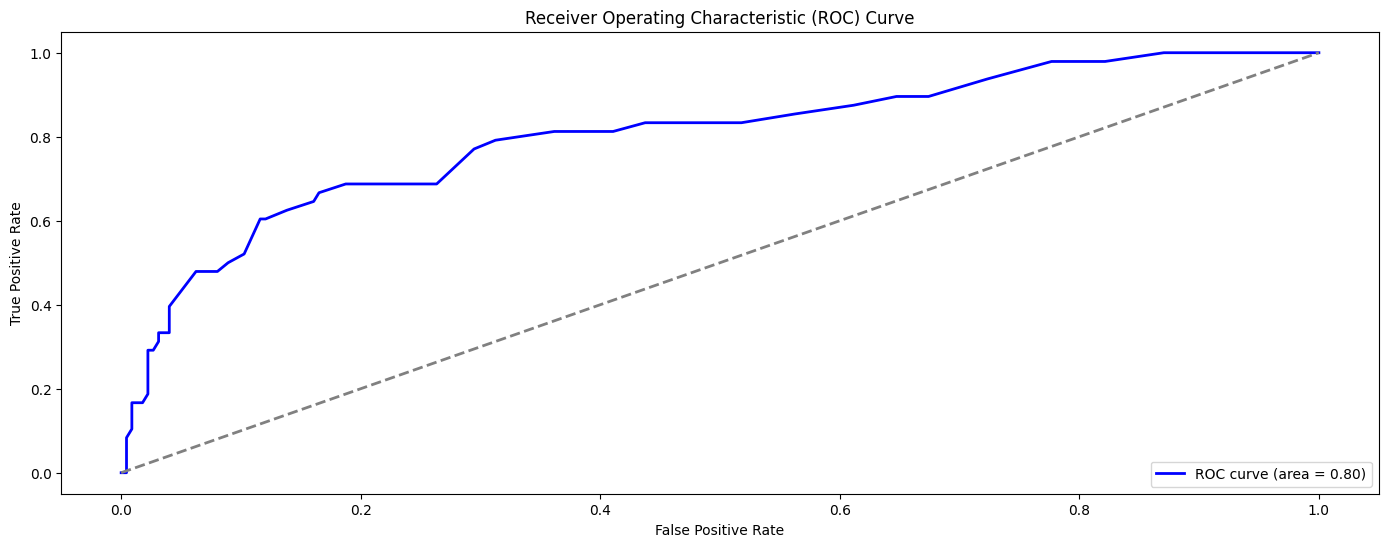

In [67]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(17, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

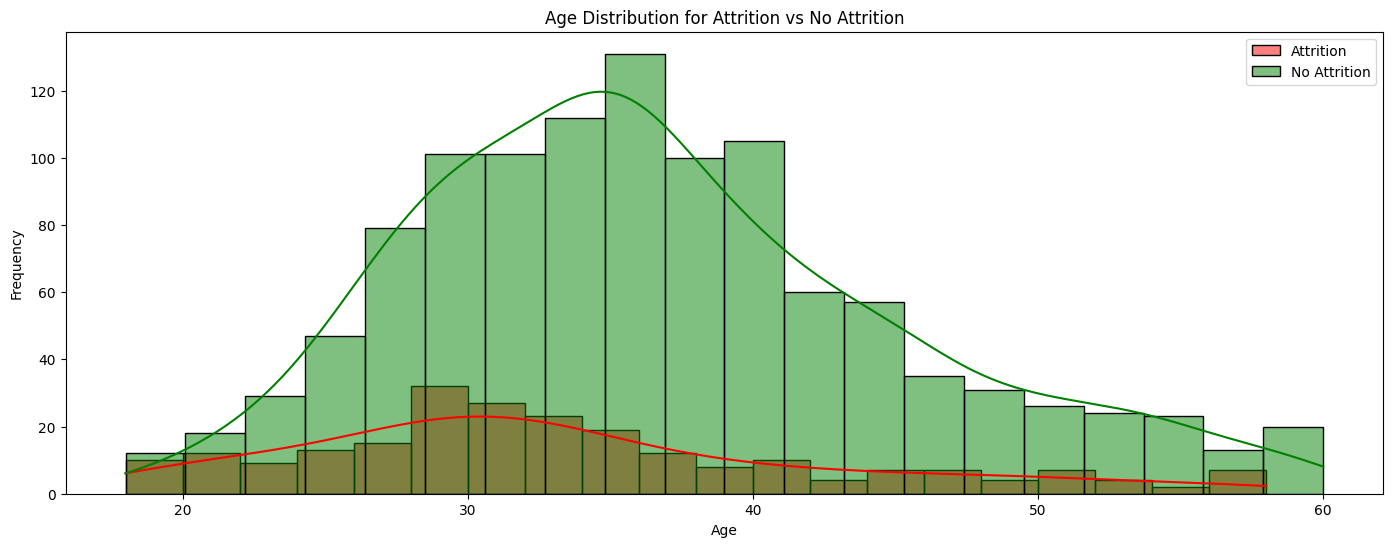

In [63]:
# Plot distributions for a feature like Age or YearsAtCompany
plt.figure(figsize=(17, 6))
sns.histplot(data[data['Attrition'] == 1]['Age'], color='red', kde=True, label="Attrition", bins=20)
sns.histplot(data[data['Attrition'] == 0]['Age'], color='green', kde=True, label="No Attrition", bins=20)
plt.title('Age Distribution for Attrition vs No Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()